In [1]:
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install -U scikit-learn

# Visa For Lisa

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

## 1.Data Collecting

In [5]:
def load_dataset(df_link):
    return pd.read_csv(df_link) 

In [6]:
URL = "https://storage.googleapis.com/qwasar-public/track-ds/Visa_For_Lisa_Loan_Modelling.csv"
df = load_dataset(URL)
df.drop('ID', axis = 1, inplace = True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## 2. Data cleaning

In [7]:
display(pd.DataFrame({"Column" : df.isna().sum().index, "Count" : df.isna().sum().values}))

,Column,Count
0,Age,0
1,Experience,0
2,Income,0
3,ZIP Code,0
4,Family,0
5,CCAvg,0
6,Education,0
7,Mortgage,0
8,Personal Loan,0
9,Securities Account,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


## 2. Data Exploration

### summarize dataset

In [9]:
def summarize_dataset(df):
    print(f"Dataset shape: {df.shape}")
    print("\nSample 10 rows from datase:")
    display(df.sample(10, random_state = 31))

    print("\n\nDescribe the dataset:")
    display(df.describe())

    print("\n\nNaN values count:")
    display(pd.DataFrame({"Column" : df.isna().sum().index, "Count" : df.isna().sum().values}))

In [10]:
summarize_dataset(df)

Dataset shape: (5000, 13)

Sample 10 rows from datase:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3914,27,3,35,94080,1,1.8,2,0,0,0,0,0,0
557,39,15,118,95039,2,1.9,1,0,0,0,0,0,1
3013,45,21,183,90029,2,1.4,1,0,0,0,0,1,1
3321,41,15,120,94521,1,5.2,1,0,0,0,0,1,0
1339,52,25,180,94545,2,9.0,2,297,1,0,0,1,0
2177,31,7,108,94507,1,4.0,1,0,0,0,0,1,0
4866,41,17,71,94801,2,3.2,1,0,0,0,0,1,1
3710,49,22,23,90032,2,1.0,2,0,0,0,0,1,1
3267,59,35,21,95818,2,1.0,1,120,0,0,0,1,0
669,56,29,41,94109,4,2.5,2,0,0,0,0,0,0




Describe the dataset:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000




NaN values count:


,Column,Count
0,Age,0
1,Experience,0
2,Income,0
3,ZIP Code,0
4,Family,0
5,CCAvg,0
6,Education,0
7,Mortgage,0
8,Personal Loan,0
9,Securities Account,0


### Dataset corelation

In [11]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


## 3. Data Visualization

### →  Dataset distribution

In [17]:
def print_histograms(df, figsize = (20, 15)):
    df.hist(figsize = figsize, bins = 20)
    plt.show()

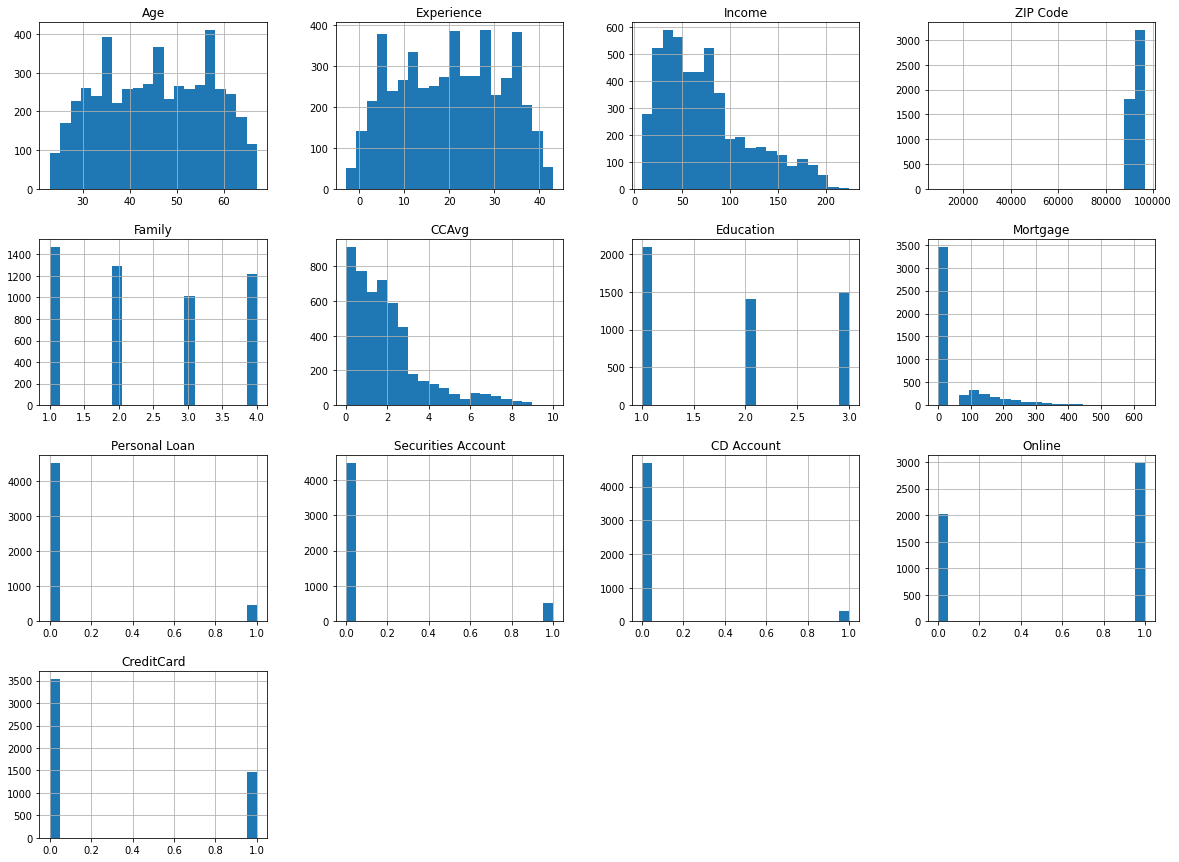

In [18]:
print_histograms(df)

In [19]:
hue = df['Personal Loan'].astype(str).replace({'1' : 'given', '0' : 'not given'}) 

In [20]:
def my_displot1(df, hue = None):
    sns.displot(data = df, x = 'Income', hue = hue, kde = True, multiple = 'stack',height = 6, aspect = 2)
    plt.title("Incoome Distrubition")
    plt.show()

    print()

    sns.displot(data = df, x = 'CCAvg', hue = hue, kde = True, multiple = 'stack',height = 6, aspect = 2)
    plt.title("CCAvg Distrubition")
    plt.show()

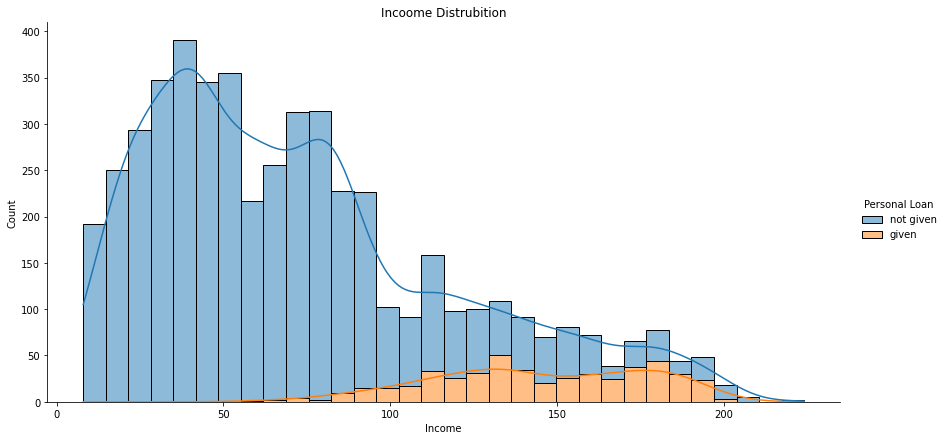

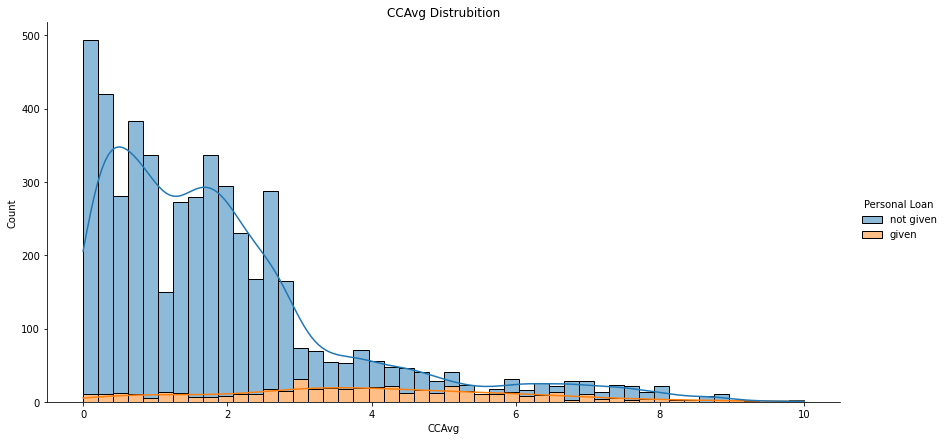

In [21]:
my_displot1(df, hue = hue)

In [22]:
def my_displot2(df, hue = None):
    sns.displot(data = df, x = 'Education', hue = hue, kde = True, multiple = 'stack', height = 6, aspect = 2)

    plt.xticks(np.arange(3)+1, ['undergraduate', 'graduate', 'advancedl'], rotation = 90)
    plt.title("Does the customer use a credit card \nissued by Universal Bank")

    plt.show()

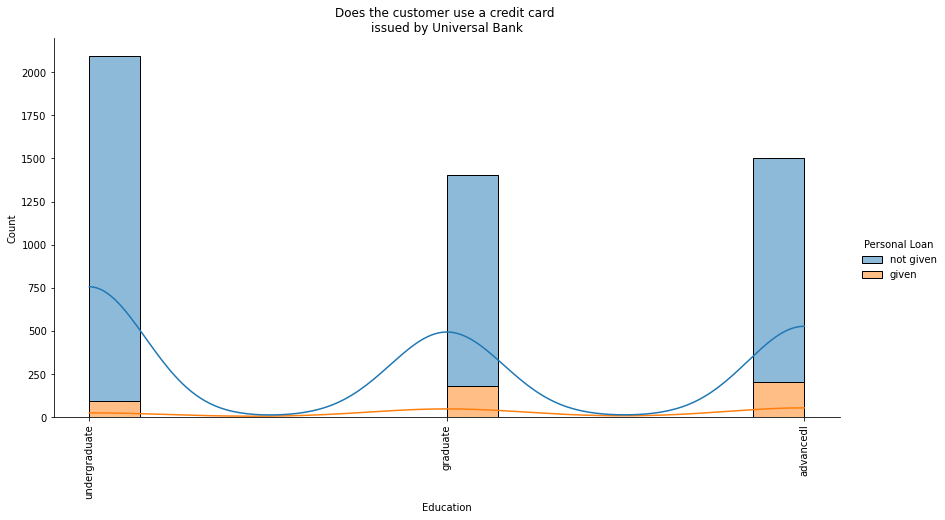

In [23]:
my_displot2(df, hue = hue)

### → Dataset Correlation as Heatmap.

In [24]:
def plot_heatmap(df):
    plt.figure(figsize = (12, 12))
    sns.heatmap(data = df.corr(), square = True, annot=True, cmap="coolwarm", linewidths = 0.1)
    plt.title("Dataset corelation")
    plt.show()

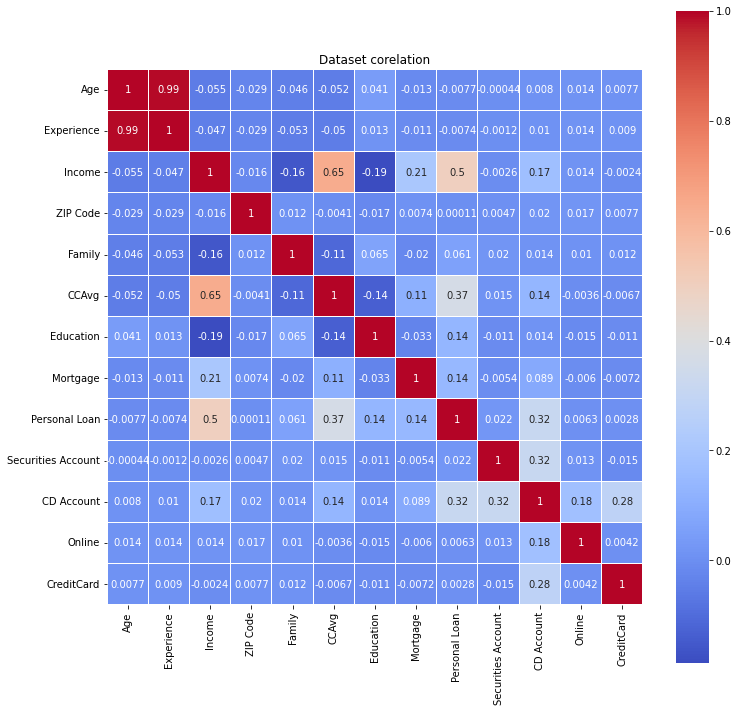

In [25]:
plot_heatmap(df)

### →   Dataset Distribution as a Pie Chart.

In [26]:
def plot_pie(df):
    figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 9))

    palette_color = sns.color_palette('bright')

    ax1.set_title("Providing personal loans to customers")
    ax1.pie(df['Personal Loan'].value_counts(), labels = ['no accepted', 'accepted'], colors = ['red', 'green'], autopct='%.0f%%', shadow = True)

    ax2.set_title("Customers education level")
    ax2.pie(df['Education'].value_counts(), labels = ['undergraduate', 'graduate', 'advanced/professional'], colors = palette_color, autopct='%.0f%%', shadow = True)

    ax3.set_title("Does the customer use a credit card \nissued by Universal Bank")
    ax3.pie(df['CreditCard'].value_counts(), labels = ['no use', 'use'], colors = palette_color, autopct='%.0f%%', shadow = True)

    plt.show()


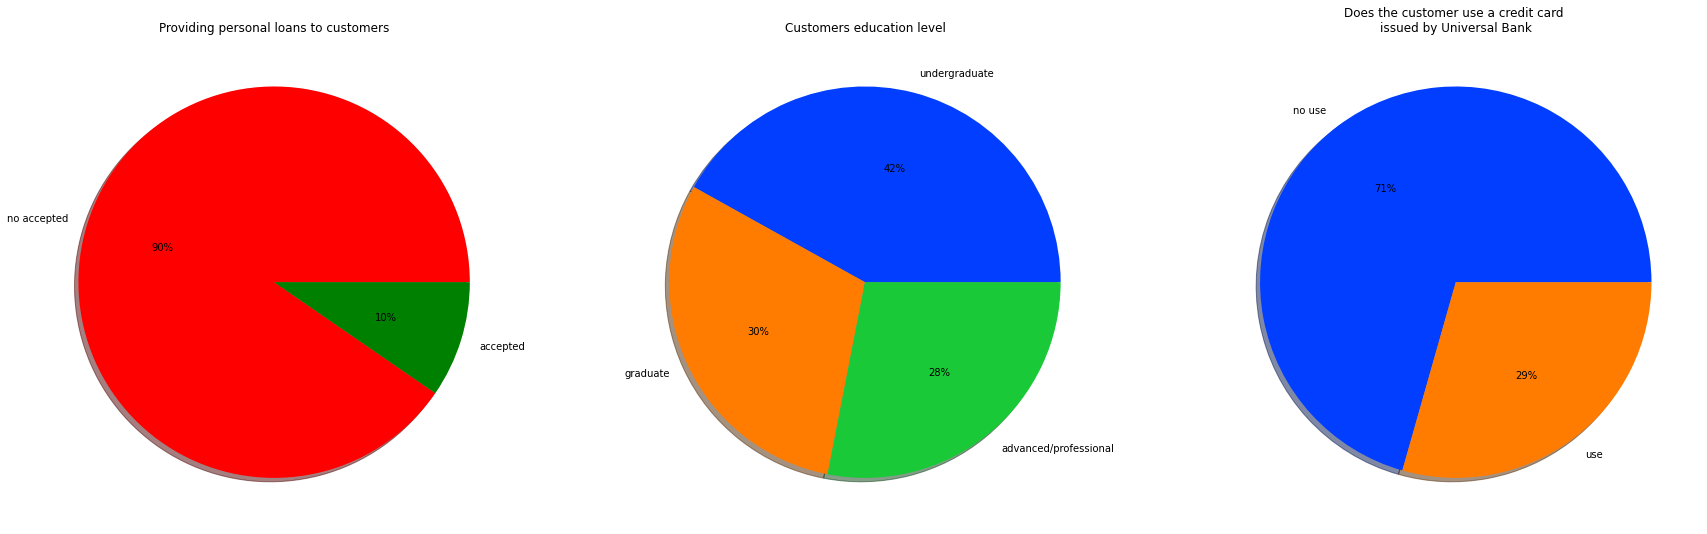

In [27]:
plot_pie(df)

### →   Plot the correlation scatter plot of the Income  against Experience, Age and Mortgage.

In [28]:
def plot_scatter(df, hue = None):
    figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 7))

    ax1.set_title("ax1")
    sns.scatterplot(data = df, x = 'Experience', y = 'Income', hue = hue, ax = ax1)

    ax2.set_title("ax2")
    sns.scatterplot(data = df, x = 'Age', y = 'Income', hue = hue, ax = ax2)

    ax2.set_title("ax3")
    sns.scatterplot(data = df, y = 'Income', x = 'Mortgage', hue = hue, ax = ax3)

    plt.show()

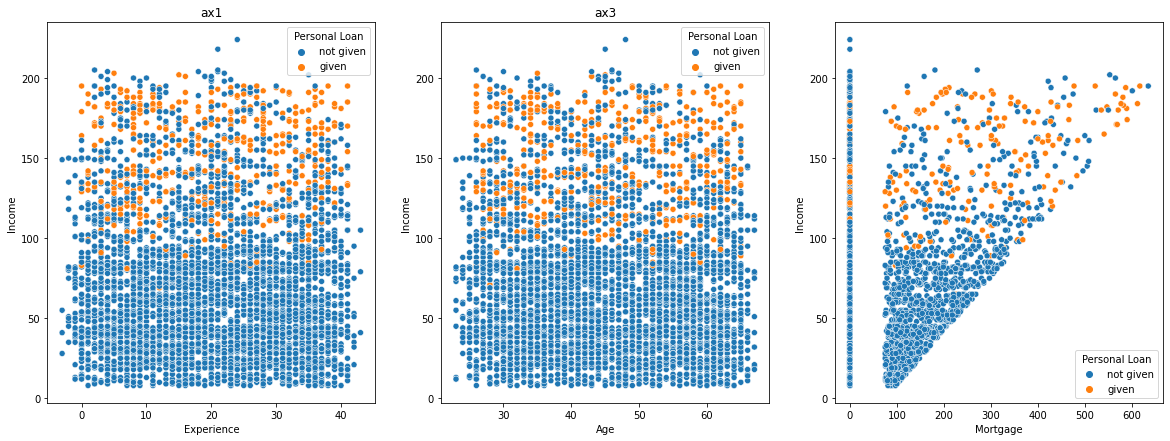

In [29]:
plot_scatter(df, hue = hue)

### →  Plot some attribute against each other.

In [30]:
def plot_pairplot(df, hue = None, columns = None):
    sns.pairplot(data=df[columns], hue = hue)
    plt.title("Some attribute against each other")
    plt.show()

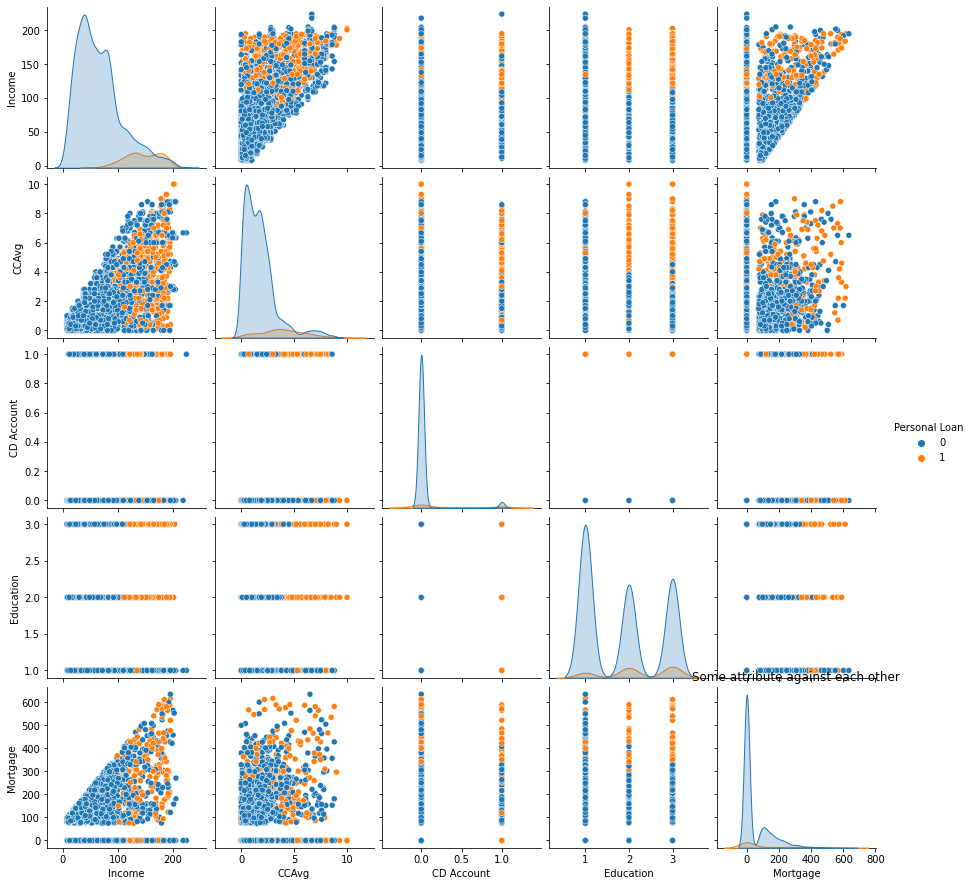

In [31]:
plot_pairplot(df, hue = 'Personal Loan', columns = ['Income', 'CCAvg', 'CD Account', 'Education', 'Mortgage', 'Personal Loan'])


## 4.Machine Learning

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import classification_report, accuracy_score, classification_report, mean_squared_error, confusion_matrix

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [34]:
class Score:
    def __init__(self, model):
        self.model = model
        self.model_name = str(model)
        self.accuracy_score = None
        self.cross_val_score = None
        self.mean_cross_val_score = None
        self.mean_squared_error = None
        self.confusion_matrix = None

    def display(self):
        print(f"Model : {self.model_name}")
        print(f"Accuracy score : {int(self.accuracy_score * 100)}%")
        print(f"Cross validation score: {int(self.mean_cross_val_score * 100)}%")
        print(f"Mean squared error: {self.mean_squared_error}")
        matrix = self.confusion_matrix
        print(f"Confusion_matrix:\n{matrix[0][0]} {matrix[0][1]} \n{matrix[1][0]}  {matrix[1][1]}\n\n")

In [35]:
class Machine_Learning:
    def __init__(self, models, x = None, y = None, test_size = 0.2):
        self.models = models
        self.fited_models = []
        self.scores = []
        self.X = x
        self.Y = y
        self.X_tarin, self.X_test, self.y_train, self.y_test = train_test_split(x, y, test_size = test_size)

    def fit(self):
        for model in self.models:
            model.fit(self.X_tarin, self.y_train)
            self.fited_models.append(model)

        return self.fited_models

    def predict(self):
        for model in self.fited_models:
            y_predict = model.predict(self.X_test)

            score = Score(model)
            score.accuracy_score = accuracy_score(self.y_test, y_predict)
            score.cross_val_score = cross_val_score(model, self.X, self.Y, cv = 10)
            score.mean_cross_val_score = np.mean(score.cross_val_score)
            score.mean_squared_error = mean_squared_error(self.y_test, y_predict)
            score.confusion_matrix = confusion_matrix(self.y_test, y_predict)

            self.scores.append(score)
        return self.scores


    def display(self):
        for score in self.scores:
            score.display()
    
    def get(self, model_name):
        for score in self.scores:
            if score.model_name == model_name:
                return score
        return None

In [36]:
models = [
          LogisticRegression(max_iter=3000),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          GaussianNB(),
          SVC(),
          KNeighborsClassifier()
         ]

In [37]:
x = df[['Income', 'CCAvg', 'CD Account', 'Education', 'Mortgage']].copy()
y = df['Personal Loan'].copy()

In [38]:
ml = Machine_Learning(models, x = x, y = y)
ml.fit()
ml.predict();

In [39]:
ml.display()

Model : LogisticRegression(max_iter=3000)
Accuracy score : 93%
Cross validation score: 94%
Mean squared error: 0.063
Confusion_matrix:
868 24 
39  69


Model : DecisionTreeClassifier()
Accuracy score : 96%
Cross validation score: 96%
Mean squared error: 0.036
Confusion_matrix:
871 21 
15  93


Model : RandomForestClassifier()
Accuracy score : 97%
Cross validation score: 96%
Mean squared error: 0.027
Confusion_matrix:
884 8 
19  89


Model : GradientBoostingClassifier()
Accuracy score : 97%
Cross validation score: 97%
Mean squared error: 0.03
Confusion_matrix:
882 10 
20  88


Model : GaussianNB()
Accuracy score : 87%
Cross validation score: 88%
Mean squared error: 0.121
Confusion_matrix:
810 82 
39  69


Model : SVC()
Accuracy score : 89%
Cross validation score: 90%
Mean squared error: 0.101
Confusion_matrix:
885 7 
94  14


Model : KNeighborsClassifier()
Accuracy score : 91%
Cross validation score: 92%
Mean squared error: 0.083
Confusion_matrix:
862 30 
53  55




### Save model

In [40]:
import pickle

In [41]:
def save_model(model, file_name):
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)
    print(f"{file_name} saved")

In [42]:
def open_model(file_name):
    with open(file_name, 'rb') as file:
        return pickle.load(file)

In [43]:
random_forest_score = ml.get("RandomForestClassifier()")
gradient_boosting_score = ml.get("GradientBoostingClassifier()")

save_model(random_forest_score.model, 'RandomForest.pkl')
save_model(gradient_boosting_score.model, 'GradientBoosting.pkl')

RandomForest.pkl saved
GradientBoosting.pkl saved


In [44]:
open_model('RandomForest.pkl')

RandomForestClassifier()

In [45]:
open_model('GradientBoosting.pkl')

GradientBoostingClassifier()